   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

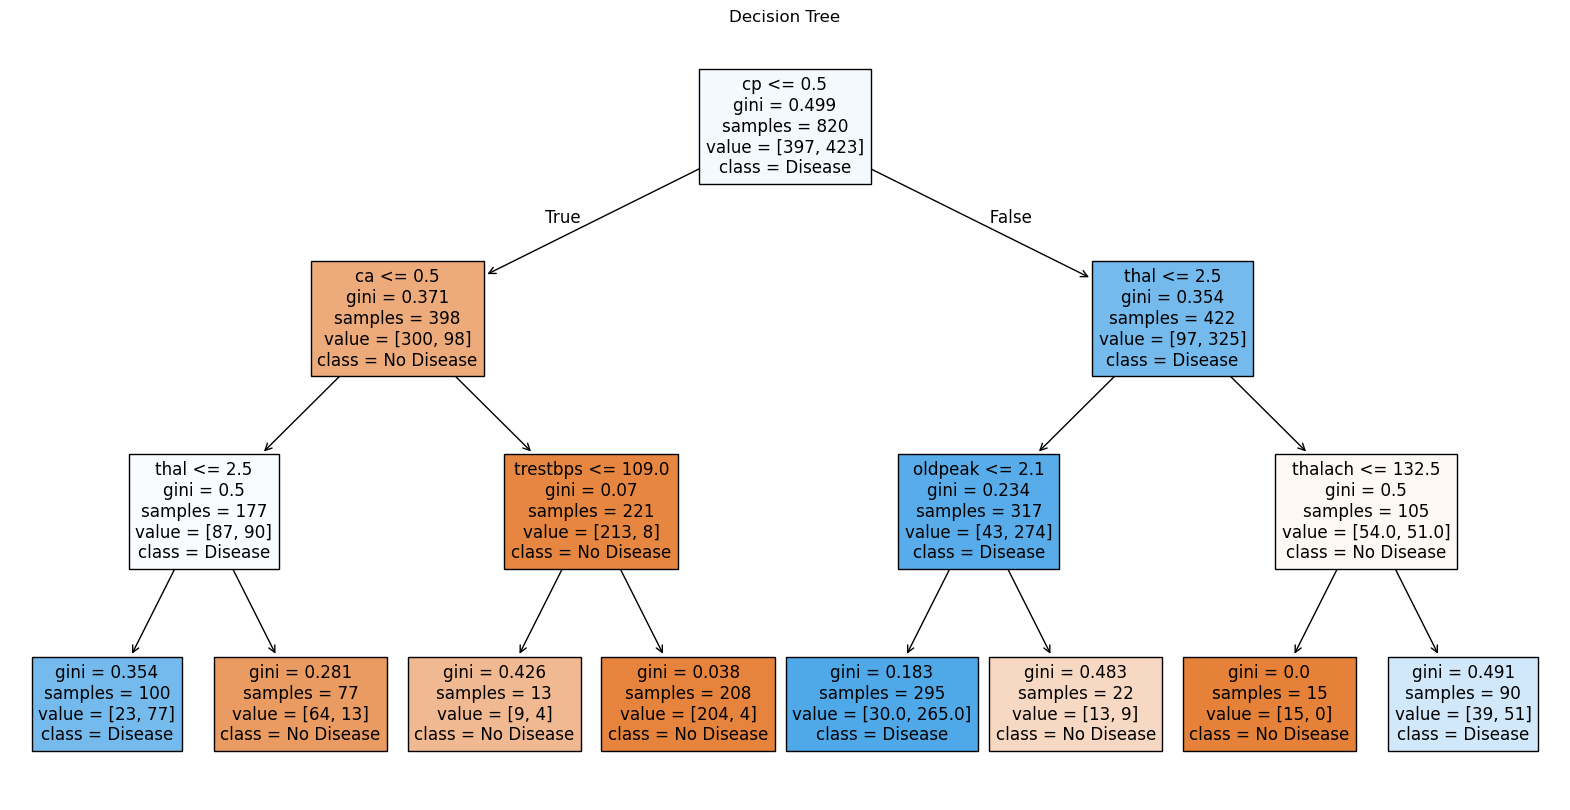

Decision Tree Accuracy: 0.7804878048780488
[[69 33]
 [12 91]]
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205

Random Forest Accuracy: 0.9853658536585366
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



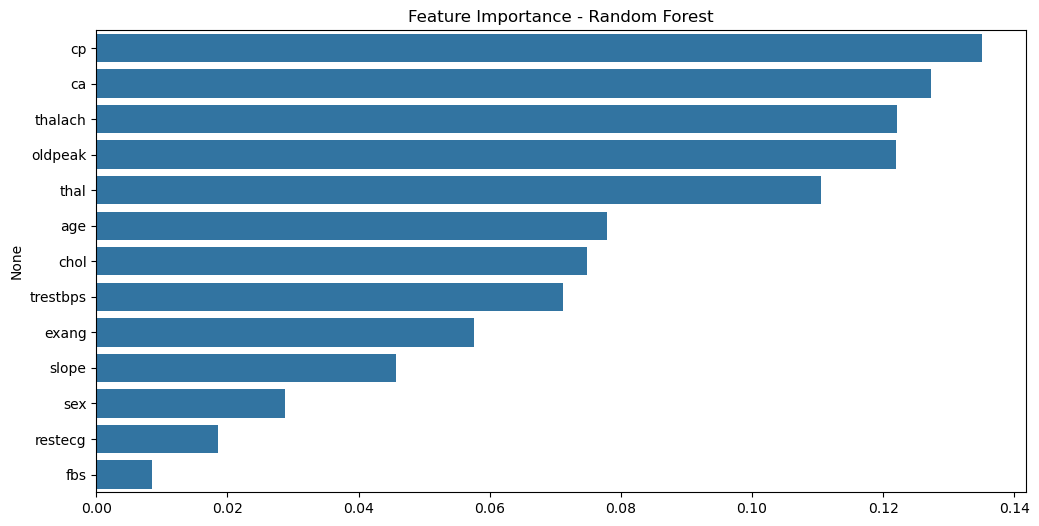

Decision Tree CV Accuracy: 0.8302
Random Forest CV Accuracy: 0.9971


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv('heart.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree")
plt.show()
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance - Random Forest")
plt.show()
cv_dt = cross_val_score(dt_model, X, y, cv=5)
cv_rf = cross_val_score(rf_model, X, y, cv=5)
print(f"Decision Tree CV Accuracy: {cv_dt.mean():.4f}")
print(f"Random Forest CV Accuracy: {cv_rf.mean():.4f}")